In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:\\Users\\Manoj\\Desktop\\sound.csv")

In [3]:
df['time_utc'] = pd.to_datetime(df['time_utc'], utc=True)

In [72]:
df.dtypes

time_utc         object
entry_id          int64
sensor_value      int64
location         object
bikes             int64
cars              int64
heavy_vehicle     int64
dtype: object

In [4]:
df.loc[:, "sensor_value"] = df["sensor_value"].apply(lambda x: x - 500)
df

,time_utc,entry_id,sensor_value,location,bikes,cars,heavy_vehicle
0,2024-01-18 08:28:25+00:00,506,70,vijayawada,16,29,85
1,2024-01-18 08:28:55+00:00,507,70,vijayawada,17,30,84
2,2024-01-18 08:29:25+00:00,508,70,vijayawada,18,31,58
3,2024-01-18 08:29:56+00:00,509,69,vijayawada,19,39,63
4,2024-01-18 08:30:28+00:00,510,70,vijayawada,20,40,84
...,...,...,...,...,...,...,...
95,2024-01-18 09:16:55+00:00,601,74,vijayawada,19,41,71
96,2024-01-18 09:17:26+00:00,602,47,vijayawada,28,42,89
97,2024-01-18 09:17:56+00:00,603,55,vijayawada,29,43,84
98,2024-01-18 09:18:27+00:00,604,67,vijayawada,11,21,86


In [5]:
df.head()

,time_utc,entry_id,sensor_value,location,bikes,cars,heavy_vehicle
0,2024-01-18 08:28:25+00:00,506,70,vijayawada,16,29,85
1,2024-01-18 08:28:55+00:00,507,70,vijayawada,17,30,84
2,2024-01-18 08:29:25+00:00,508,70,vijayawada,18,31,58
3,2024-01-18 08:29:56+00:00,509,69,vijayawada,19,39,63
4,2024-01-18 08:30:28+00:00,510,70,vijayawada,20,40,84


In [6]:
df.tail()

,time_utc,entry_id,sensor_value,location,bikes,cars,heavy_vehicle
95,2024-01-18 09:16:55+00:00,601,74,vijayawada,19,41,71
96,2024-01-18 09:17:26+00:00,602,47,vijayawada,28,42,89
97,2024-01-18 09:17:56+00:00,603,55,vijayawada,29,43,84
98,2024-01-18 09:18:27+00:00,604,67,vijayawada,11,21,86
99,2024-01-18 09:18:58+00:00,605,57,vijayawada,12,16,88


In [78]:
df.isnull()

,time_utc,entry_id,sensor_value,location,bikes,cars,heavy_vehicle
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time_utc       100 non-null    datetime64[ns, UTC]
 1   entry_id       100 non-null    int64              
 2   sensor_value   100 non-null    int64              
 3   location       100 non-null    object             
 4   bikes          100 non-null    int64              
 5   cars           100 non-null    int64              
 6   heavy_vehicle  100 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 5.6+ KB


In [80]:
df.describe()

,entry_id,sensor_value,bikes,cars,heavy_vehicle
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,555.500000,576.270000,19.540000,29.250000,72.880000
std,29.011492,7.405779,5.113697,11.194673,12.009491
min,506.000000,547.000000,11.000000,11.000000,42.000000
25%,530.750000,570.000000,16.000000,18.000000,63.000000
50%,555.500000,578.500000,19.000000,29.500000,71.000000
75%,580.250000,581.000000,23.250000,40.000000,84.000000
max,605.000000,586.000000,29.000000,54.000000,89.000000


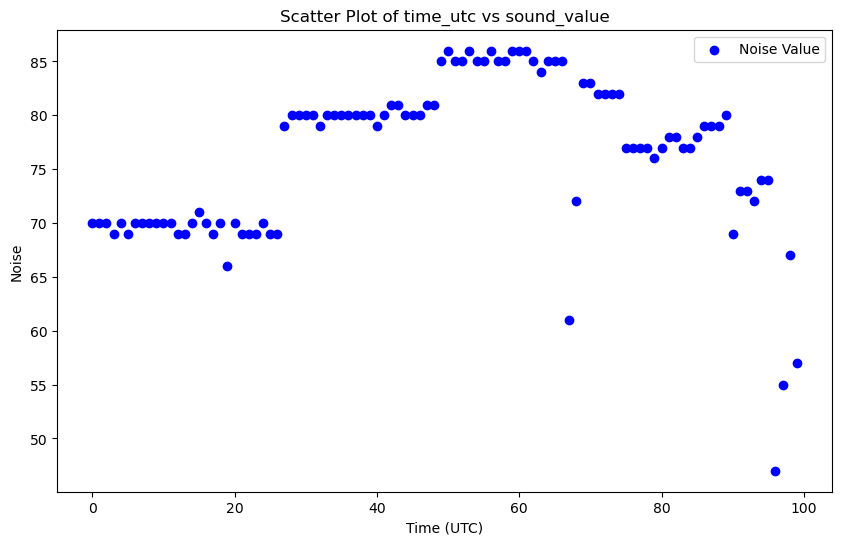

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['sensor_value'], color='blue', label='Noise Value')
plt.title('Scatter Plot of time_utc vs sound_value')
plt.xlabel('Time (UTC)')
plt.ylabel('Noise')
plt.legend()
plt.show()

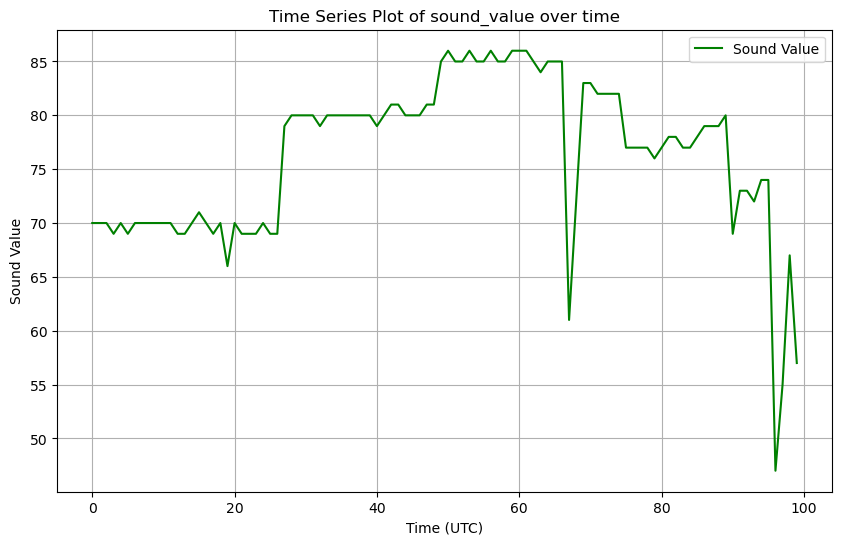

In [84]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sensor_value'], color='green', label='Sound Value')
plt.title('Time Series Plot of sound_value over time')
plt.xlabel('Time (UTC)')
plt.ylabel('Sound Value')
plt.legend()
plt.grid(True)
plt.show()


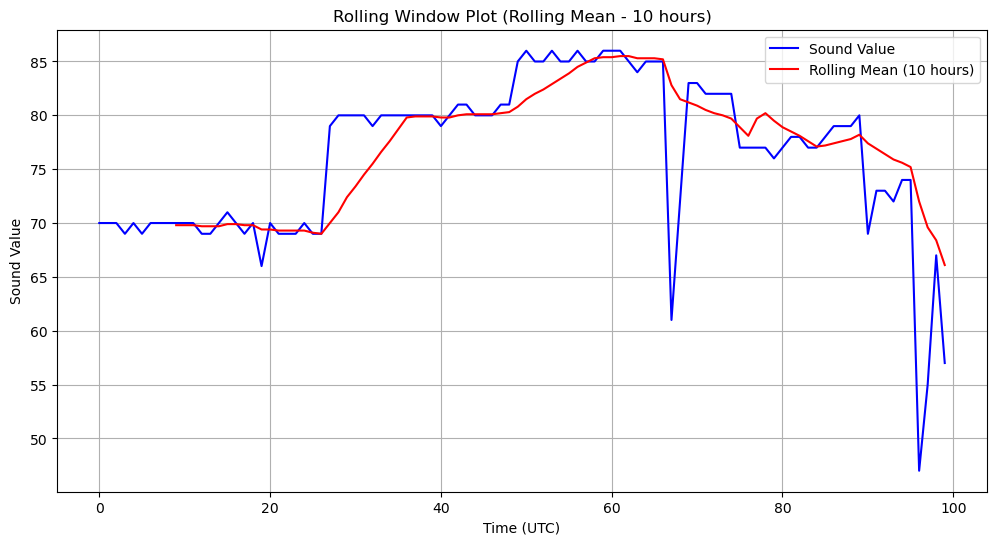

In [85]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

window_size = 10

# Create a rolling window plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sensor_value'], label='Sound Value', color='blue')
plt.plot(df['sensor_value'].rolling(window=window_size).mean(), label=f'Rolling Mean ({window_size} hours)', color='red')

plt.title(f'Rolling Window Plot (Rolling Mean - {window_size} hours)')
plt.xlabel('Time (UTC)')
plt.ylabel('Sound Value')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

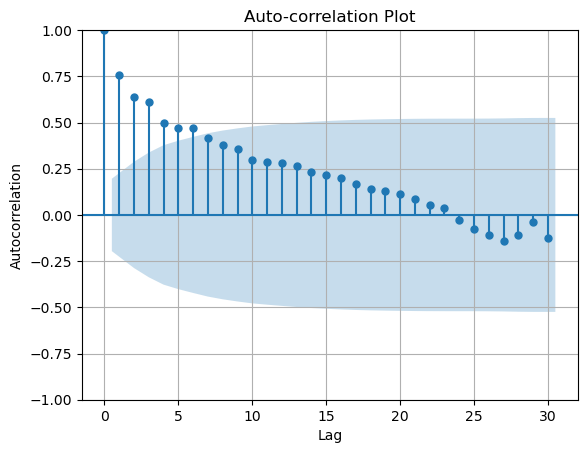

In [86]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Plot the auto-correlation
plt.figure(figsize=(12, 6))
plot_acf(df['sensor_value'], lags=30, title='Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df[['sensor_value']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Now, you can use the model to make predictions on new data
# For example, if you have a new time_utc value, you can predict the sound_value
new_data = {
    'time_utc': ['2024-01-18 9:18:00']
}

new_df = df
new_df['time_utc'] = pd.to_datetime(new_df['time_utc'])
new_df['time_utc'] = (new_df['time_utc'] - df['time_utc'].min()).dt.total_seconds()

new_prediction = model.predict(new_df[['time_utc']])
print(f'Predicted Sound Value: {new_prediction[0]}')


Mean Squared Error: 25.38747634861503
Predicted Sound Value: [74.68181908]


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Define the hyperparameter grid to search
param_grid = {
    'linearregression__fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Optimized Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the percentage accuracy (using the mean of y_test)
accuracy = 100 - rmse / y_test.mean() * 100
print(f'Percentage Accuracy: {accuracy:.2f}%')

# Now, you can use the optimized model to make predictions on new data
new_prediction = best_model.predict(df[['time_utc']])
print(f'Optimized Predicted Sound Value: {new_prediction[0]}')


Optimized Mean Squared Error: 25.38747634861502
Root Mean Squared Error (RMSE): 5.03859864928881
Percentage Accuracy: 93.40%
Optimized Predicted Sound Value: 74.6818190809366


Mean Squared Error: 4.734375000000004
Root Mean Squared Error (RMSE): 2.1758618981911524
Percentage Accuracy: 97.15%
Optimized Predicted Sound Value: 69.66666666666667


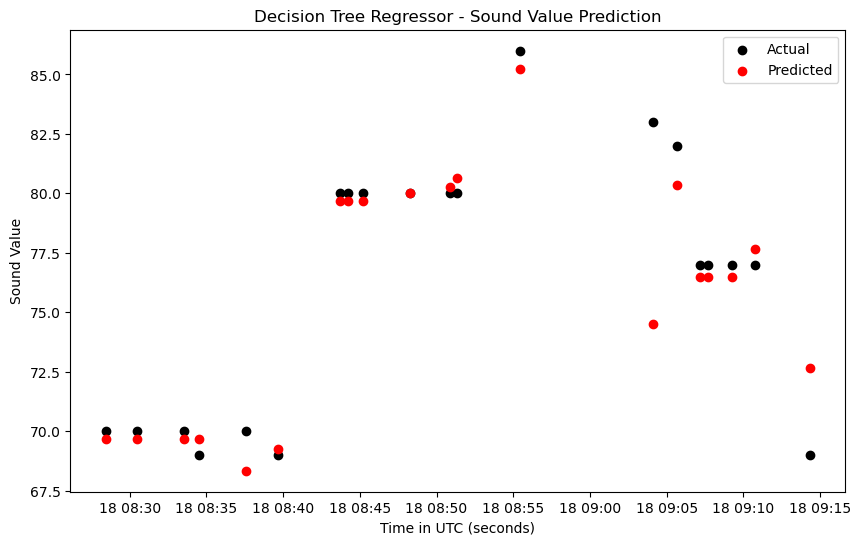

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the percentage accuracy (using the mean of y_test)
accuracy = 100 - rmse / y_test.mean() * 100
print(f'Percentage Accuracy: {accuracy:.2f}%')

new_prediction = model.predict(df[['time_utc']])
print(f'Optimized Predicted Sound Value: {new_prediction[0]}')

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Decision Tree Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Mean Squared Error: 28.711406250000003


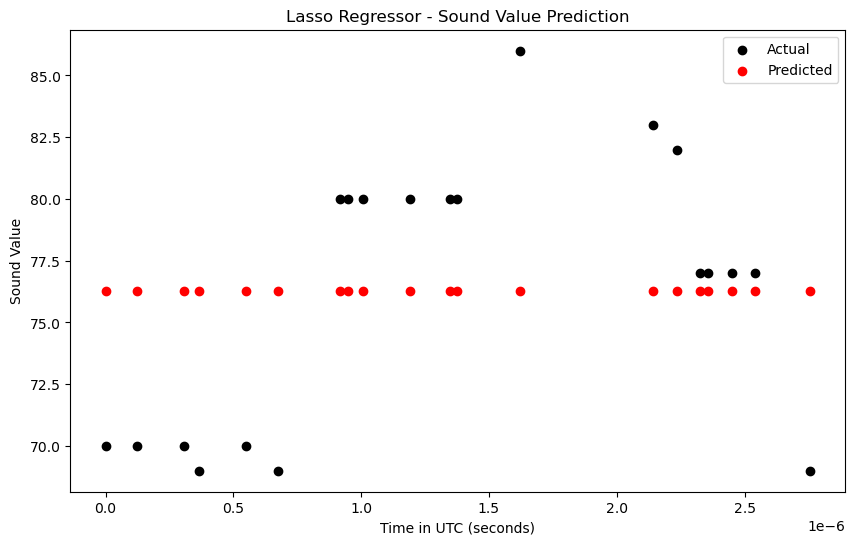

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso Regressor model
model = Lasso(alpha=1.0)  # Adjust the alpha parameter based on your dataset

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the Lasso Regressor predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Lasso Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()

Mean Squared Error: 15.539008831676146


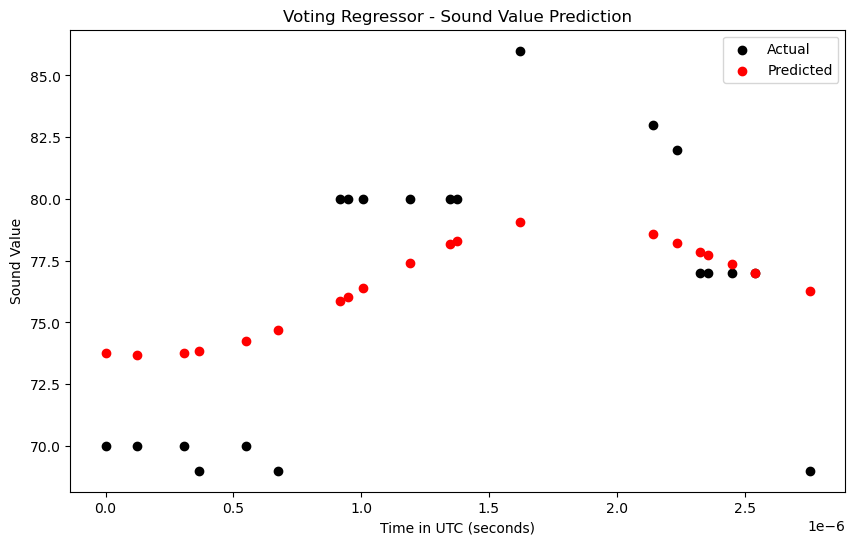

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual regression models
linear_model = LinearRegression()
svr_model = SVR()
lasso_model = Lasso(alpha=1.0)

# Create a Voting Regressor model
model = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('svr', svr_model),
    ('lasso', lasso_model)
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the Voting Regressor predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Voting Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Mean Squared Error: 35.4699999999318


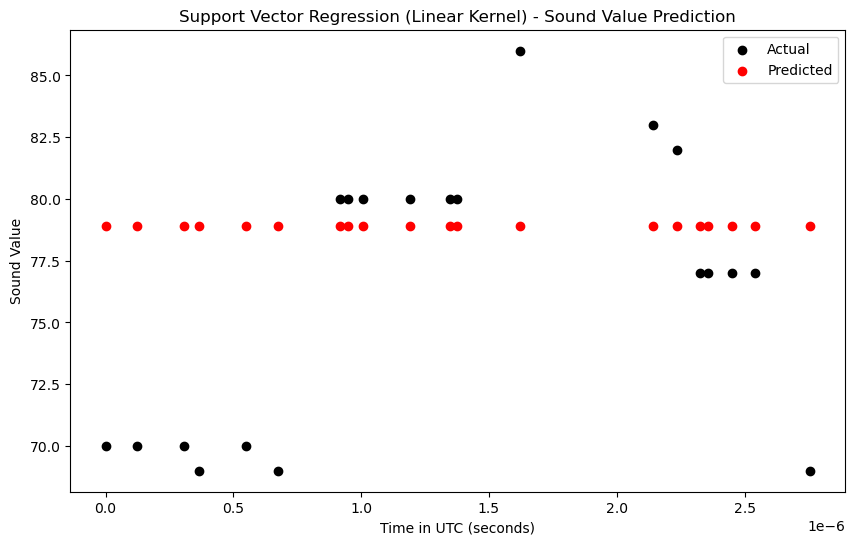

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regressor model with a linear kernel
model = SVR(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the Support Vector Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Support Vector Regression (Linear Kernel) - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Mean Squared Error: 4.632807496824671
Root Mean Squared Error (RMSE): 2.152395757481572
Percentage Accuracy: 97.18%
Optimized Predicted Sound Value: 69.6960476415625


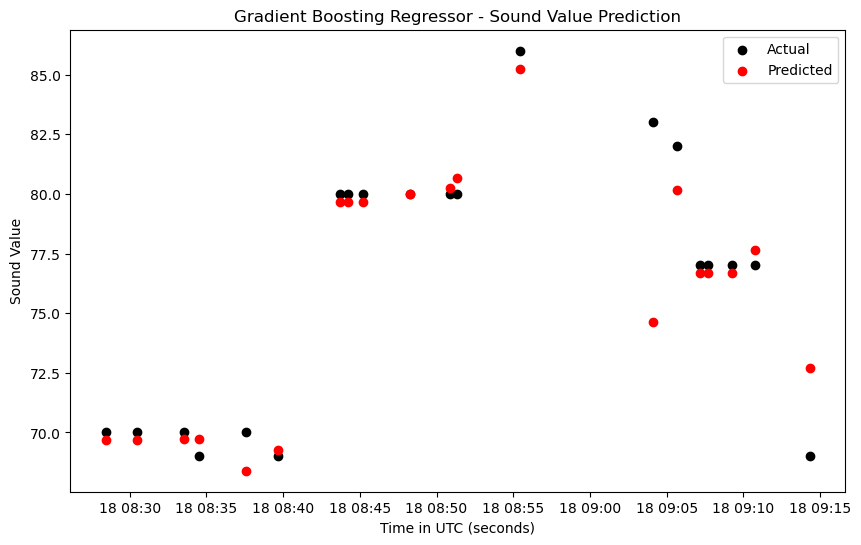

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the percentage accuracy (using the mean of y_test)
accuracy = 100 - rmse / y_test.mean() * 100
print(f'Percentage Accuracy: {accuracy:.2f}%')


new_prediction = model.predict(df[['time_utc']])
print(f'Optimized Predicted Sound Value: {new_prediction[0]}')


# Visualize the Gradient Boosting Regressor predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Gradient Boosting Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Mean Squared Error: 28.711406249741106


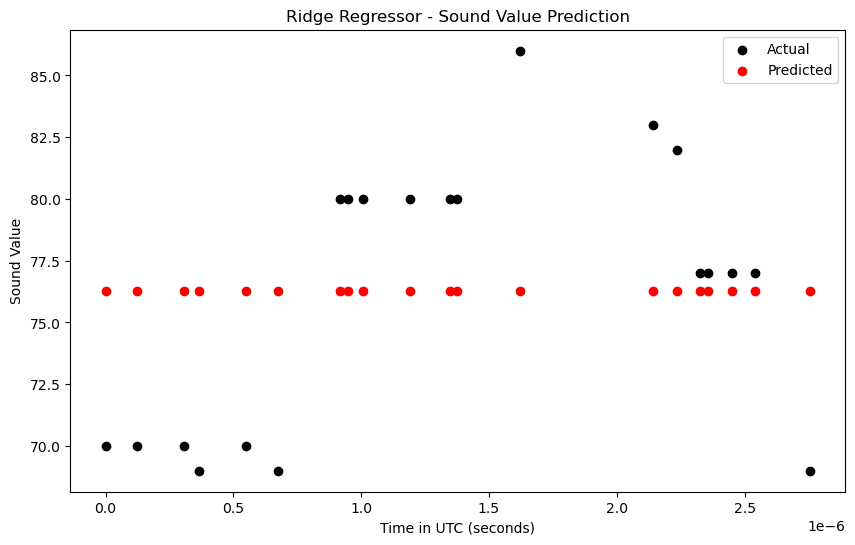

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Regressor model
model = Ridge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the Ridge Regressor predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Ridge Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Mean Squared Error: 6.4291013915036945
Root Mean Squared Error (RMSE): 2.152395757481572
Percentage Accuracy: 97.18%
Optimized Predicted Sound Value: 70.29607970001545


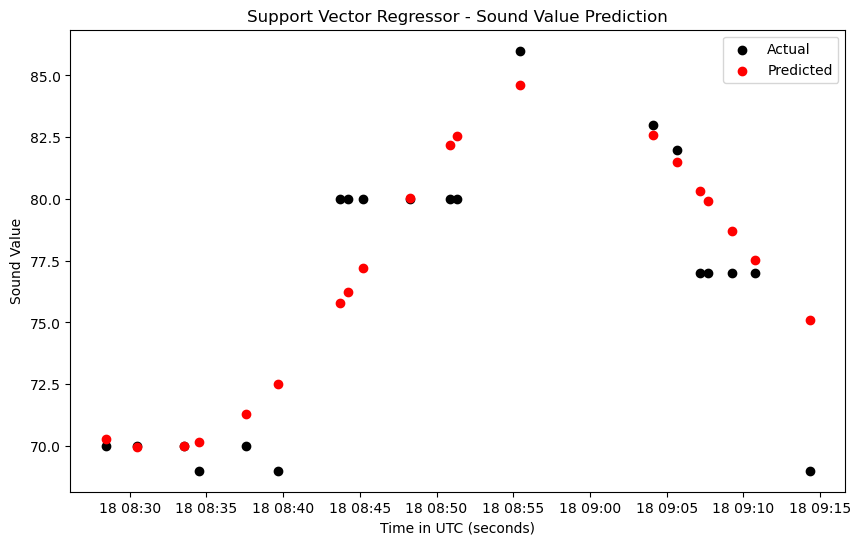

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np


# Split the data into features (X) and target variable (y)
X = df[['time_utc']]
y = df['sensor_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regressor model
model = SVR()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


mse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the percentage accuracy (using the mean of y_test)
accuracy = 100 - rmse / y_test.mean() * 100
print(f'Percentage Accuracy: {accuracy:.2f}%')

new_prediction = model.predict(df[['time_utc']])
print(f'Optimized Predicted Sound Value: {new_prediction[0]}')

# Visualize the Support Vector Regressor predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Support Vector Regressor - Sound Value Prediction')
plt.xlabel('Time in UTC (seconds)')
plt.ylabel('Sound Value')
plt.legend()
plt.show()


Percentage Increase in Sound Value is: 29.517100013213074
Root Mean Squared Error (RMSE): 21.78069717253823
R^2 Score: -5.018188694577588


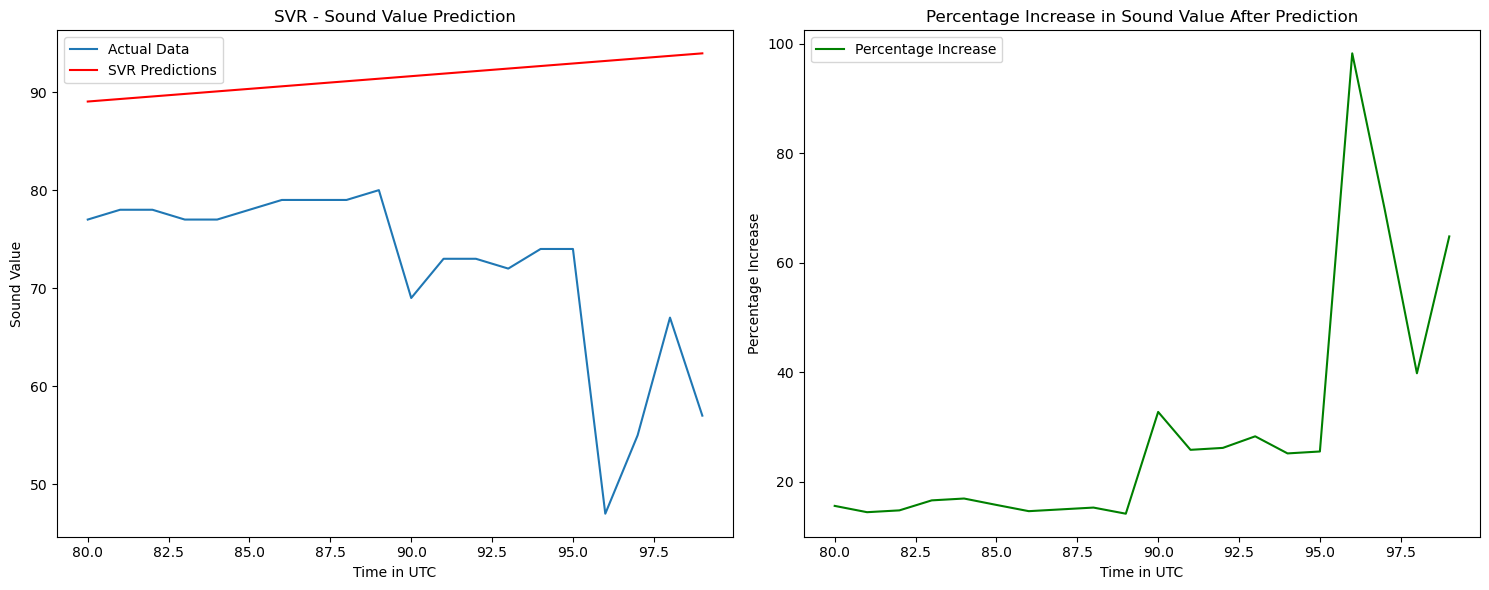

In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Manually split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Support Vector Regressor (SVR) model
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train['sensor_value'].values
X_test, y_test = np.arange(len(train), len(df)).reshape(-1, 1), test['sensor_value'].values

model = SVR(kernel='linear')  # You can choose different kernels based on your requirements
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the differences between predicted and actual values
increase_values = predictions - test['sensor_value'].values

# Calculate the percentage increase
percentage_increase = (increase_values / test['sensor_value'].values) * 100

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['sensor_value'].values, predictions))
r2 = r2_score(test['sensor_value'].values, predictions)
print('Percentage Increase in Sound Value is:',percentage_increase.mean())
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Visualize the SVR predictions
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(test.index, test['sensor_value'], label='Actual Data')
plt.plot(test.index, predictions, label='SVR Predictions', color='red')
plt.title('SVR - Sound Value Prediction')
plt.xlabel('Time in UTC')
plt.ylabel('Sound Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test.index, percentage_increase, label='Percentage Increase', color='green')
plt.title('Percentage Increase in Sound Value After Prediction')
plt.xlabel('Time in UTC')
plt.ylabel('Percentage Increase')
plt.legend()

plt.tight_layout()
plt.show()


In [107]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'y_test' is the actual sound values and 'predictions' is the predicted values
# (as generated in the SVR code)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# You can also calculate the percentage accuracy, though it's not a standard measure for regression.
# It's more common to interpret RMSE and other regression metrics.

# Calculate the percentage accuracy (using the mean of y_test)
accuracy = 100 - rmse / y_test.mean() * 100
print(f'Percentage Accuracy: {accuracy:.2f}%')


Root Mean Squared Error (RMSE): 9.896332882779665
Percentage Accuracy: 86.28%


In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score


# Manually split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA model
order = (1, 1, 1)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train['sensor_value'])
results = model.fit()

# Forecasting on the test set
start = len(train)
end = len(df) + len(test) - 1
predictions = results.get_forecast(steps=len(test)).predicted_mean

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['sensor_value'], predictions))
r2 = r2_score(test['sensor_value'], predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')


Root Mean Squared Error (RMSE): 10.264012330581329
R^2 Score: -0.33646188350925166


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Manually split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# SARIMA model
order = (1, 1, 1)  # Example order for SARIMA model (p, d, q)
seasonal_order = (1, 1, 1, 24)  # Example seasonal order (P, D, Q, S)
model = SARIMAX(train['sensor_value'], order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

# Forecasting on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['sensor_value'], predictions))
r2 = r2_score(test['sensor_value'], predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')


C:\Users\Manoj\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Root Mean Squared Error (RMSE): 10.455618906224007
R^2 Score: -0.38682524134583596


In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Manually split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(train['sensor_value'], seasonal='add', seasonal_periods=24)  # Adjust 'seasonal_periods' based on the seasonality of your data
results = model.fit()

# Forecasting on the test set
predictions = results.predict(start=test.index[0], end=test.index[-1])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['sensor_value'], predictions))
r2 = r2_score(test['sensor_value'], predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')


Root Mean Squared Error (RMSE): 9.429677850064554
R^2 Score: -0.12801781555926595


Root Mean Squared Error (RMSE): 9.896332882779665
Percentage Increase: 35.96%
Accuracy: 86.28%


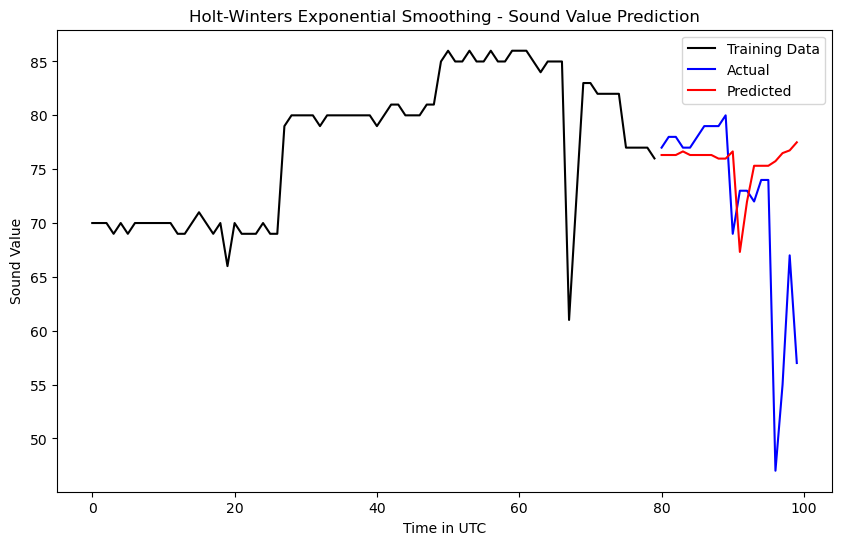

In [110]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets (for demonstration purposes)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(np.asarray(train['sensor_value']), trend='add', seasonal='add', seasonal_periods=24)
result = model.fit()

# Make predictions on the test set
predictions = result.forecast(steps=len(test))

# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
mse = mean_squared_error(test['sensor_value'].values, predictions)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the percentage increase in sound value
percentage_increase = ((predictions[-1] - test['sensor_value'].values[-1]) / test['sensor_value'].values[-1]) * 100
print(f'Percentage Increase: {percentage_increase:.2f}%')

accuracy = 100 - rmse / test['sensor_value'].mean() * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sensor_value'], label='Training Data', color='black')
plt.plot(test.index, test['sensor_value'], label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Holt-Winters Exponential Smoothing - Sound Value Prediction')
plt.xlabel('Time in UTC')
plt.ylabel('Sound Value')
plt.legend()
plt.show()
